<a href="https://colab.research.google.com/github/hdyzjyq/MrHuangDaye.github.io/blob/master/dl_assignment1_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep learning: assignment 1
##Chaoyi Wang & Jinglei Yu

##Part 1

In [ ]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
def load_data ():
  N = 500
  gq = sklearn.datasets.make_gaussian_quantiles (
mean=None ,
cov =0.7 ,
n_samples =N,
n_features =2,
n_classes =2,
shuffle=True ,
random_state =None)
  return gq

In [ ]:
dat = load_data()

###Data handling and visualization

In [ ]:
X = dat[0]
y = dat[1]

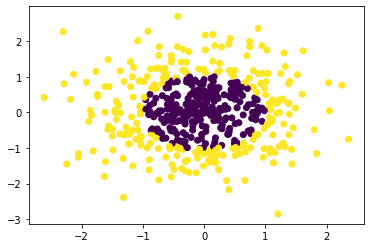

In [ ]:
#scatter plot
plt.scatter(X[:,0],X[:,1],c=y)

In [ ]:
#how many points 
sum(y)

250

half of the data is y=0.

###Designing and training the ANN

#### Train-test spliting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train = X_train.T
X_test = X_test.T 
y_train = y_train.reshape(1,y_train.shape[0])
y_test = y_test.reshape(1,y_test.shape[0])

#### Implementation of at least one hidden layer

In [ ]:
n_input, n_hidden, n_output = 2, 4, 1
m = X_train.shape[1] #sample number

#### Initialisation of weight matrices and biases

In [ ]:
def Initialisation():
  #from inspect import Parameter
  #hidden layer (4,2) (4,1)
  w1 = np.random.rand(4,2)
  b1 = np.zeros((4,1))
  #output layer (1,4) (1,1)
  w2 = np.random.rand(1,4)
  b2 = np.zeros((1,1))

  parameters = {"w1":w1,"b1":b1,"w2":w2,"b2":b2}
  return parameters

####Forward Pass

In [ ]:
def foward_pass(X_train, parameters):
  w1 = parameters['w1']
  b1 = parameters['b1']
  w2 = parameters['w2']
  b2 = parameters['b2']
  z1 = np.dot(w1,X_train) + b1
  h1 = np.tanh(z1) #tanh
  z2 = np.dot(w2,h1) + b2
  h2 = 1/(1+np.exp(-z2))#sigmoid
  h = {'h1':h1,'h2':h2}
  return(h)


####Backward Pass

In [ ]:
def cost_function(y_train, h):
  m = y_train.shape[1]
  y = h['h2']
  # binary cross entropy = -1/m(ylogy + (1-y)log(1-y))
  cost = -np.sum(np.multiply(np.log(y),y_train) + np.multiply((1-y_train),np.log(1-y)))/m
  cost = float(cost)
  return cost

In [ ]:
def backward_pass(parameters, h, X_train, y_train):
  h1 = h['h1']
  h2 = h['h2']
  w2 = parameters['w2']
  #output->hidden
  dz2 = h2 - y_train
  dw2 = (1/m) * np.dot(dz2, h1.T)
  db2 = (1/m) * np.sum(dz2, axis = 1, keepdims = True)
  #hidden->input
  dz1 = np.multiply(np.dot(w2.T, dz2), 1-np.power(h1, 2))
  dw1 = (1/m) * np.dot(dz1, X_train.T)
  db1 = (1/m) * np.sum(dz1, axis = 1, keepdims = True)
  d = {'dw1':dw1, 'dw2':dw2, 'db1':db1, 'db2':db2}
  return d

####Stochastic Gradient Descent

In [ ]:
def gradient_descent(parameters, d, lr = 0.5):
  w1 = parameters['w1']
  b1 = parameters['b1']
  w2 = parameters['w2']
  b2 = parameters['b2']
  dw1 = d['dw1']
  db1 = d['db1']
  dw2 = d['dw2']
  db2 = d['db2']
  learning_rate = lr
  w1 = w1 - learning_rate * dw1
  b1 = b1 - learning_rate * db1
  w2 = w2 - learning_rate * dw2
  b2 = b2 - learning_rate * db2
  p = {"w1":w1,"b1":b1,"w2":w2,"b2":b2}
  return p

####Training

In [ ]:
n = 1000 #iteration times
parameters = Initialisation()
loss = np.zeros(n)
acc = np.zeros(n)
for i in range(0,n):
  h = foward_pass(X_train, parameters)
  d = backward_pass(parameters, h, X_train, y_train)
  parameters = gradient_descent(parameters, d, lr = 0.5)
  cost = cost_function(y_train, h)
  if i%100 == 0:
    print("Iteration %i , loss = %.8f" %(i,cost))
  loss[i] = cost
  output = np.round(h['h2'])
  acc[i] = float(np.dot (output,y_train.T) + np.dot(1-output, 1-y_train.T))/float(y_train.shape[1])

Iteration 0 , loss = 0.84855491
Iteration 100 , loss = 0.53692108
Iteration 200 , loss = 0.33472544
Iteration 300 , loss = 0.25158430
Iteration 400 , loss = 0.21550227
Iteration 500 , loss = 0.19478643
Iteration 600 , loss = 0.18018359
Iteration 700 , loss = 0.16859139
Iteration 800 , loss = 0.15891629
Iteration 900 , loss = 0.15071100


Text(0, 0.5, 'Loss')

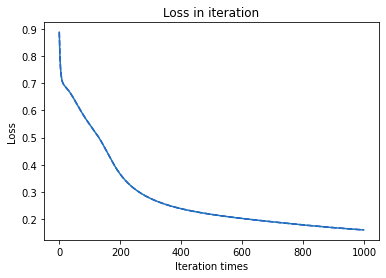

In [ ]:
iteration_time = range(n)
l1 = plt.plot(iteration_time,loss,'b--')
plt.plot(iteration_time,loss)
plt.title('Loss in iteration')
plt.xlabel('Iteration times')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

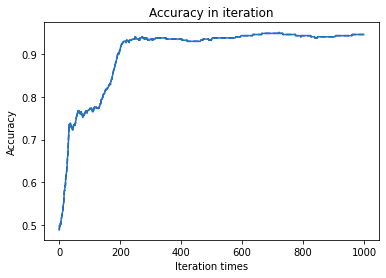

In [ ]:
l2 = plt.plot(iteration_time,acc,'b--')
plt.plot(iteration_time,acc)
plt.title('Accuracy in iteration')
plt.xlabel('Iteration times')
plt.ylabel('Accuracy')

###Testing

In [ ]:
output = np.round(foward_pass(X_test, parameters)['h2'])
accuracy = float(np.dot (output,y_test.T) + np.dot(1-output, 1-y_test.T))/float(y_test.shape[1])         
accuracy

0.944

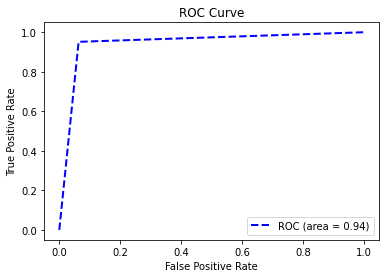

In [ ]:
from sklearn.metrics import roc_curve, auc
 
y_label = y_test[0]
y_pre = output[0]
fpr, tpr, thersholds = roc_curve(y_label, y_pre, pos_label=1)
 
roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'b--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
plt.title('ROC Curve')
plt.legend(loc="lower right")

##Part 2

###Building the ANN with packages

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
model = Sequential([
    Dense(4, input_dim=2, activation='tanh', name='hidden'),
    Dense(1, activation='sigmoid', name='output')
])
model.compile(loss='binary_crossentropy', 
              optimizer=SGD(lr=0.5),
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, shuffle=True, verbose=2)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


12/12 - 1s - loss: 0.7011 - accuracy: 0.5707 - 501ms/epoch - 42ms/step
Epoch 2/100
12/12 - 0s - loss: 0.6521 - accuracy: 0.6533 - 25ms/epoch - 2ms/step
Epoch 3/100
12/12 - 0s - loss: 0.6214 - accuracy: 0.6587 - 22ms/epoch - 2ms/step
Epoch 4/100
12/12 - 0s - loss: 0.5863 - accuracy: 0.7360 - 24ms/epoch - 2ms/step
Epoch 5/100
12/12 - 0s - loss: 0.5508 - accuracy: 0.7280 - 22ms/epoch - 2ms/step
Epoch 6/100
12/12 - 0s - loss: 0.5133 - accuracy: 0.7867 - 31ms/epoch - 3ms/step
Epoch 7/100
12/12 - 0s - loss: 0.4788 - accuracy: 0.8640 - 21ms/epoch - 2ms/step
Epoch 8/100
12/12 - 0s - loss: 0.4506 - accuracy: 0.9147 - 24ms/epoch - 2ms/step
Epoch 9/100
12/12 - 0s - loss: 0.4230 - accuracy: 0.9067 - 20ms/epoch - 2ms/step
Epoch 10/100
12/12 - 0s - loss: 0.3993 - accuracy: 0.9280 - 22ms/epoch - 2ms/step
Epoch 11/100
12/12 - 0s - loss: 0.3806 - accuracy: 0.9387 - 21ms/epoch - 2ms/step
Epoch 12/100
12/12 - 0s - loss: 0.3578 - accuracy: 0.9520 - 22ms/epoch - 2ms/step
Epoch 13/100
12/12 - 0s - loss: 0.3

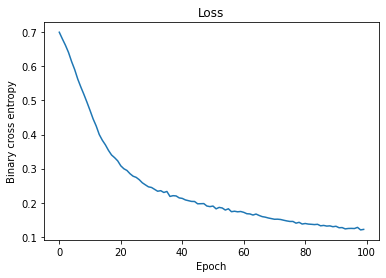

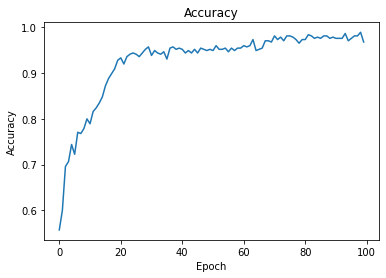

In [ ]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('Binary cross entropy')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

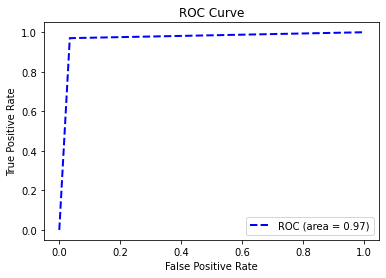

In [164]:
y_label = y_test
y_pre = np.round(model.predict(X_test).ravel())

fpr, tpr, thersholds = roc_curve(y_label, y_pre, pos_label=1)
 
roc_auc = auc(fpr, tpr)
 
plt.plot(fpr, tpr, 'b--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
 
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
plt.title('ROC Curve')
plt.legend(loc="lower right")

###Model comparison

####Did 10 runs for the 1st model

In [ ]:
from sklearn import metrics

acc_10_m1 = np.zeros(10)
f1_10_m1 = np.zeros(10)
for j in range(10):
  n = 1000 #iteration times
  parameters = Initialisation()
  for i in range(0,n):
    h = foward_pass(X_train, parameters)
    d = backward_pass(parameters, h, X_train, y_train)
    parameters = gradient_descent(parameters, d, lr = 0.5)
    cost = cost_function(y_train, h)
    if i//1000 == 1:
      print("run %i completed" %(i))
  output = np.round(foward_pass(X_test, parameters)['h2'])
  accuracy = float(np.dot (output,y_test.T) + np.dot(1-output, 1-y_test.T))/float(y_test.shape[1])         
  acc_10_m1[j] = accuracy
  f1 = metrics.f1_score(y_test[0], output[0], average='weighted')
  f1_10_m1[j] = f1

mean_acc_m1 = np.mean(acc_10_m1)
sd_acc_m1 = np.std(acc_10_m1)
mean_f1_m1 = np.mean(f1_10_m1)
sd_f1_m1 = np.std(f1_10_m1)

####Did 10 funs for the 2nd model

In [168]:
acc_10_m2 = np.zeros(10)
f1_10_m2 = np.zeros(10)

for k in range(10):
  history = model.fit(X_train, y_train, epochs=100, shuffle=True, verbose=2)
  y_pre = np.round(model.predict(X_test).ravel())
  f1_10_m2[k] = metrics.f1_score(y_test, y_pre, average='weighted')
  acc_10_m2[k] = metrics.accuracy_score(y_test, y_pre)

mean_acc_m2 = np.mean(acc_10_m2)
sd_acc_m2 = np.std(acc_10_m2)
mean_f1_m2 = np.mean(f1_10_m2)
sd_f1_m2 = np.std(f1_10_m2)

Epoch 1/100
12/12 - 0s - loss: 0.1706 - accuracy: 0.9387 - 447ms/epoch - 37ms/step
Epoch 2/100
12/12 - 0s - loss: 0.1103 - accuracy: 0.9600 - 37ms/epoch - 3ms/step
Epoch 3/100
12/12 - 0s - loss: 0.1134 - accuracy: 0.9520 - 30ms/epoch - 3ms/step
Epoch 4/100
12/12 - 0s - loss: 0.1234 - accuracy: 0.9413 - 32ms/epoch - 3ms/step
Epoch 5/100
12/12 - 0s - loss: 0.1240 - accuracy: 0.9573 - 30ms/epoch - 3ms/step
Epoch 6/100
12/12 - 0s - loss: 0.1829 - accuracy: 0.9333 - 29ms/epoch - 2ms/step
Epoch 7/100
12/12 - 0s - loss: 0.0988 - accuracy: 0.9600 - 31ms/epoch - 3ms/step
Epoch 8/100
12/12 - 0s - loss: 0.1064 - accuracy: 0.9627 - 67ms/epoch - 6ms/step
Epoch 9/100
12/12 - 0s - loss: 0.0892 - accuracy: 0.9707 - 39ms/epoch - 3ms/step
Epoch 10/100
12/12 - 0s - loss: 0.1195 - accuracy: 0.9440 - 38ms/epoch - 3ms/step
Epoch 11/100
12/12 - 0s - loss: 0.1047 - accuracy: 0.9573 - 34ms/epoch - 3ms/step
Epoch 12/100
12/12 - 0s - loss: 0.1265 - accuracy: 0.9573 - 43ms/epoch - 4ms/step
Epoch 13/100
12/12 - 0s